In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color, morphology, draw
from skimage.segmentation import flood, flood_fill

In [32]:
img = np.zeros((200, 200, 3))

In [33]:
x, y, v = draw.line_aa(0,0,50,60)

In [34]:
img[x, y] = np.array([1,.6,.2]).reshape(1, -1) * v.reshape(-1, 1)

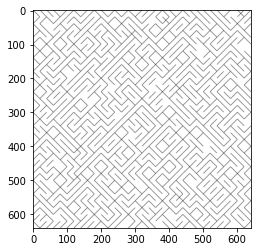

In [228]:
plt.imshow(img)

In [109]:
?np.max

In [225]:
blank = np.zeros
full = np.ones

fwd = blank((20, 20, 3))
x, y, v = draw.line_aa(0, 0, 19, 19)
fwd[x, y] = v.reshape(-1, 1) * full((1, 3))
bak = blank((20, 20, 3))
x, y, v = draw.line_aa(0, 19, 19, 0)
bak[x, y] = v.reshape(-1, 1) * full((1, 3))
ex = blank((20, 20, 3))
x, y, v = draw.line_aa(0, 19, 19, 0)
ex[x, y] = v.reshape(-1, 1) * full((1, 3))
x, y, v = draw.line_aa(0, 0, 19, 19)
ex[x, y] = np.max((ex[x, y], v.reshape(-1, 1) * full((1, 3))), axis=0)

fwd, bak = bak, fwd

In [301]:
ii = 48
jj = 32
img = blank((20*ii,20*jj,3))
for i in range(ii):
    for j in range(jj):
        p = np.random.random(1)
        if p < .48:
            img[i*20:(i+1)*20, j*20:(j+1)*20] = bak
        elif p < .96:
            img[i*20:(i+1)*20, j*20:(j+1)*20] = fwd
        elif p < .97:
            img[i*20:(i+1)*20, j*20:(j+1)*20] = ex
            
img = np.ones_like(img) - img

In [302]:
for i in range(ii):
    for j in list(range(jj))+[-1]:
        x = i*20+10
        y = j*20+5 if (j != -1) else jj*20-5
        if img[x, y, 0] == 1.:
            mask = flood(img[:,:,0], (x, y), connectivity=1)
            color = np.array([0., .5, .3]) + np.random.random(3) * np.array([.8, .5, .6])
            img[mask] = color

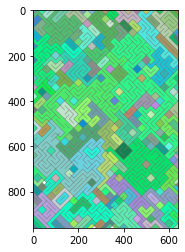

In [303]:
plt.imshow(img)
plt.show()

In [212]:
plt.imsave('/home/adam/snek-pastel.png', img[:-10,:])

In [304]:
plt.imsave('/home/adam/snek-gren4.png', img)